## Recurrent Neural Network

### Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Part 2 -Building the RNN

In [6]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU

Using TensorFlow backend.


In [7]:
# Initialising the RNN
regressorLSTM = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressorLSTM.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressorLSTM.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressorLSTM.add(LSTM(units = 50, return_sequences = True))
regressorLSTM.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressorLSTM.add(LSTM(units = 50, return_sequences = True))
regressorLSTM.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressorLSTM.add(LSTM(units = 50))
regressorLSTM.add(Dropout(0.2))

# Adding the output layer
regressorLSTM.add(Dense(units = 1))

# Compiling the RNN
regressorLSTM.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the RNN to the Training set
regressorLSTM.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0510 - acc: 0.0017
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0062 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0050 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0046 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0054 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0019 - acc: 0.0017
Epoch 75/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0021 - acc: 0.0017
Epoch 76/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0018 - acc: 0.0017
Epoch 77/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0019 - acc: 0.0017
Epoch 78/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017 - acc: 0.0017
Epoch 79/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016 - acc: 0.0017
Epoch 80/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016 - acc: 0.0017
Epoch 81/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0019 - acc: 0.0017
Epoch 82/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0017 - acc: 0.0017
Epoch 83/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0018 - acc: 0.0017
Epoch 84/100
1198/1198 

### Part 3 - Making the predictions and visualising the results
#### LSTM with 50 Units

In [8]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [9]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressorLSTM.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

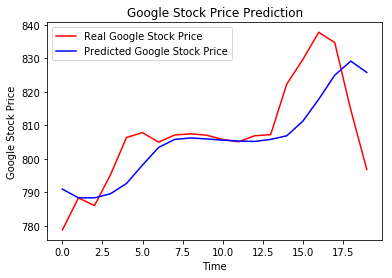

In [10]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [11]:
# Initialising the RNN
regressorLSTM2 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressorLSTM2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressorLSTM2.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressorLSTM2.add(LSTM(units = 100, return_sequences = True))
regressorLSTM2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressorLSTM2.add(LSTM(units = 100, return_sequences = True))
regressorLSTM2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressorLSTM2.add(LSTM(units = 100))
regressorLSTM2.add(Dropout(0.2))

# Adding the output layer
regressorLSTM2.add(Dense(units = 1))

# Compiling the RNN
regressorLSTM2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the RNN to the Training set
regressorLSTM2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0371 - acc: 0.0017
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0036 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0035 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0035 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0035 - acc: 0.0017
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0032 - acc: 0.0017
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0030 - acc: 0.0017
Epoch 11/100
1198/1

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0012 - acc: 0.0017
Epoch 84/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011 - acc: 0.0017
Epoch 85/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010 - acc: 0.0017
Epoch 86/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0011 - acc: 0.0017
Epoch 87/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0011 - acc: 0.0017
Epoch 88/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0014 - acc: 0.0017
Epoch 89/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0011 - acc: 0.0017
Epoch 90/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013 - acc: 0.0017
Epoch 91/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012 - acc: 0.0017
Epoch 92/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0010 - acc: 0.0017
Epoch 93/100
1198/1198 

#### LSTM with 100 Units

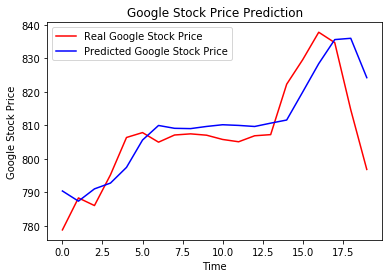

In [12]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressorLSTM2.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [13]:
# Initialising the RNN
regressorGRU = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressorGRU.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressorGRU.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressorGRU.add(GRU(units = 50, return_sequences = True))
regressorGRU.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressorGRU.add(GRU(units = 50, return_sequences = True))
regressorGRU.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressorGRU.add(GRU(units = 50))
regressorGRU.add(Dropout(0.2))

# Adding the output layer
regressorGRU.add(Dense(units = 1))

# Compiling the RNN
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the RNN to the Training set
regressorGRU.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0237 - acc: 0.0017
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0062 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0054 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0046 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0043 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0035 - acc: 0.0017
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0039 - acc: 0.0017
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0038 - acc: 0.0017
Epoch 11/100
1198/1

1198/1198 [==============================] - 4s 4ms/step - loss: 0.0013 - acc: 0.0017
Epoch 84/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014 - acc: 0.0017
Epoch 85/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014 - acc: 0.0017
Epoch 86/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014 - acc: 0.0017
Epoch 87/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 0.0017
Epoch 88/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0013 - acc: 0.0017
Epoch 89/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013 - acc: 0.0017
Epoch 90/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 0.0017
Epoch 91/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0012 - acc: 0.0017
Epoch 92/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 0.0017
Epoch 93/100
1198/1198 

#### GRU with 50 Units

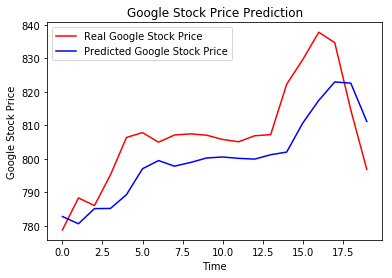

In [14]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressorGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [15]:
# Initialising the RNN
regressorGRU2 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressorGRU2.add(GRU(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressorGRU2.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressorGRU2.add(GRU(units = 100, return_sequences = True))
regressorGRU2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressorGRU2.add(GRU(units = 100, return_sequences = True))
regressorGRU2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressorGRU2.add(GRU(units = 100))
regressorGRU2.add(Dropout(0.2))

# Adding the output layer
regressorGRU2.add(Dense(units = 1))

# Compiling the RNN
regressorGRU2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the RNN to the Training set
regressorGRU2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0291 - acc: 0.0017
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0037 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0034 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0031 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0032 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0029 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0028 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0026 - acc: 0.0017
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0025 - acc: 0.0017
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0029 - acc: 0.0017
Epoch 11/100
1198/

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0011 - acc: 0.0017
Epoch 84/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012 - acc: 0.0017
Epoch 85/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012 - acc: 0.0017
Epoch 86/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011 - acc: 0.0017
Epoch 87/100
1198/1198 [==============================] - 5s 4ms/step - loss: 9.7443e-04 - acc: 0.0017
Epoch 88/100
1198/1198 [==============================] - 6s 5ms/step - loss: 9.5565e-04 - acc: 0.0017
Epoch 89/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010 - acc: 0.0017
Epoch 90/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010 - acc: 0.0017
Epoch 91/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010 - acc: 0.0017
Epoch 92/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010 - acc: 0.0017
Epoch 93/100
11

#### GRU with 100 Units

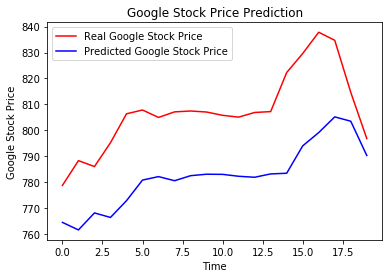

In [16]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressorGRU2.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()